In [0]:
import pandas as pd
import nltk
import re
import numpy as np
from nltk.tokenize import RegexpTokenizer
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

result = pd.read_csv('https://bit.ly/2PiepHg')

# 1. Reproduza a tabela 4.1 do livro texto calculando as estatísticas para sua coleção

In [0]:
tknzr = RegexpTokenizer(r'(\b[A-Za-z][a-z]{2,27}\b)')
words = []
for cel in result.text:
  for word in tknzr.tokenize(cel.lower()):
    if (len(word) > 3 and not bool(re.search(r'\d', word))):
      words.append(word)

In [0]:
total_occurrences = len(words)
total_documents = result.text.count()
word_frequency = Counter(words)
vocab_size = len(word_frequency)
more_than_1000_occurrences = len([freq for freq in word_frequency.values() if freq > 1000])
exactly_one_occurrence = len([freq for freq in word_frequency.values() if freq == 1])


In [68]:
stats_table = pd.DataFrame(data = {'Item':['Total documents',
                                              'Total word occurrences',
                                              'Vocabulary size', 
                                              'Words occurring > 1000 times',
                                              'Words occurring once '],
                                  'Value':[total_documents,
                                             total_occurrences,
                                             vocab_size,
                                             more_than_1000_occurrences,
                                             exactly_one_occurrence]})

stats_table.index += 1
stats_table


,Item,Value
1,Total documents,249
2,Total word occurrences,101865
3,Vocabulary size,17550
4,Words occurring > 1000 times,3
5,Words occurring once,8777


# 2. Reproduza a tabela 4.2 do livro considerando as top-50 palavras mais frequentes de sua coleção. 

In [69]:
top_50_words = word_frequency.most_common(50)
top_50_table = pd.DataFrame(columns = ['Word', 'Frequency', 'r', 'Pr(%)', 'r.Pr'])

top_50_table['Word'] = [tp_word[0] for tp_word in top_50_words]
top_50_table['Frequency'] = [tp_word[1] for tp_word in top_50_words]
top_50_table['r'] = [rank+1 for rank in range(0, len(top_50_words))]
top_50_table['Pr(%)'] = [round((word[1] / total_occurrences)*100, 2) for word in top_50_words]
top_50_table['r.Pr'] = round((top_50_table['Pr(%)']/100)*top_50_table['r'], 3)

top_50_table.index += 1
top_50_table


,Word,Frequency,r,Pr(%),r.Pr
1,para,2323,1,2.28,0.023
2,como,1329,2,1.30,0.026
3,mais,1206,3,1.18,0.035
4,anos,585,4,0.57,0.023
5,pelo,489,5,0.48,0.024
6,pela,467,6,0.46,0.028
7,isso,445,7,0.44,0.031
8,sobre,426,8,0.42,0.034
9,entre,422,9,0.41,0.037
10,presidente,416,10,0.41,0.041


# 3. Plote curvas de rank-frequência (usando escala logarítmica) para palavras e bigramas na coleção que você coletou na atividade anterior. Quais os melhores valores do parâmetro c para cada curva ?

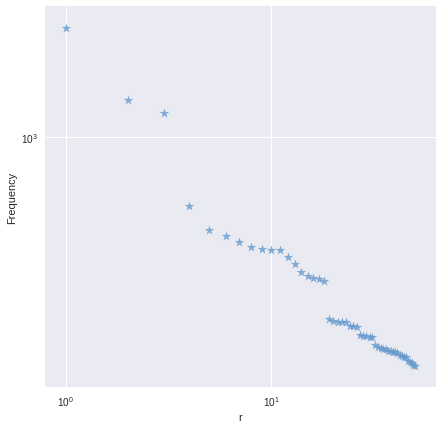

In [70]:

f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
sns.regplot("r", "Frequency", top_50_table, ax=ax, marker="*", scatter_kws={"s": 100}, fit_reg = False, color = '#6699cc')

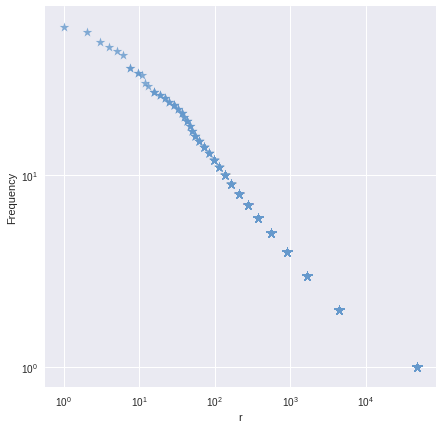

In [71]:

bigrams = []
bigrams = nltk.bigrams(words)
bigrams_freq = nltk.FreqDist(bigrams)
bigrams_table = pd.DataFrame(bigrams_freq.most_common(), columns=['word', 'Frequency'])
bigrams_table['r'] = bigrams_table['Frequency'].rank(ascending=False)

f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
sns.regplot("r", "Frequency", bigrams_table, ax=ax, marker="*", scatter_kws={"s": 100}, fit_reg = False, color = '#6699cc')

# 4. Reproduza a tabela 4.5 do livro texto considerando a sua coleção.

In [72]:

general_table = pd.DataFrame()
general_table['Number of Occurrences (n)'] = word_frequency.values() 
general_table = prop_table.groupby(['Number of Occurrences (n)'])['Number of Occurrences (n)'].size().reset_index(name='Actual Number of Words')
general_table['Predicted Proportion (1/n(n+1))'] = round(1 / (prop_table['Number of Occurrences (n)']*(prop_table['Number of Occurrences (n)'] + 1)), 3)
general_table['Actual Proportion'] = round(prop_table['Actual Number of Words'] / len(word_frequency), 3)
general_table = prop_table[['Number of Occurrences (n)', 'Predicted Proportion (1/n(n+1))', 'Actual Proportion', 'Actual Number of Words']]
general_table.head(10)

,Number of Occurrences (n),Predicted Proportion (1/n(n+1)),Actual Proportion,Actual Number of Words
1,1,0.500,0.500,8777
2,2,0.167,0.163,2867
3,3,0.083,0.079,1380
4,4,0.050,0.050,880
5,5,0.033,0.035,612
6,6,0.024,0.023,401
7,7,0.018,0.018,314
8,8,0.014,0.015,261
9,9,0.011,0.012,218
10,10,0.009,0.011,197
